In [1]:
#The numpy module has functions that deals with linear algebra and matrices.
import numpy as np
#Pandas module reads the data as table format
import pandas as pd
#matplotlib library provides the visualization functions
import matplotlib.pyplot as plt
#seaborn is another visualization tool, which benefits also statistical operations
import seaborn as sns

In [5]:
#Firstly, reading the data from read_csv() function
mydata=pd.read_csv(r"C:\Users\Admin\OneDrive\Desktop\heart_disease.csv")
#here dropping off the columns 'currentSmoker','education','diaBP','heartRate'
mydata.drop(['currentSmoker','education','diaBP','heartRate'],axis=1,inplace=True)
#let's view the data
mydata.head()

,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,glucose,TenYearCHD
0,1,39,0.0,0.0,0,0,0,195.0,106.0,26.97,77.0,0
1,0,46,0.0,0.0,0,0,0,250.0,121.0,28.73,76.0,0
2,1,48,20.0,0.0,0,0,0,245.0,127.5,25.34,70.0,0
3,0,61,30.0,0.0,0,1,0,225.0,150.0,28.58,103.0,1
4,0,46,23.0,0.0,0,0,0,285.0,130.0,23.10,85.0,0


In [6]:
#calculating the mean for 'glucose' column
mean = mydata['glucose'].mean()
#Inserting the mean value of 'glucose' in nan values
mydata['glucose'].fillna(mean, inplace=True)
#calculating the mean for 'totChol' column
mean = mydata['totChol'].mean()
#Inserting the mean value of 'totChol' in nan values
mydata['totChol'].fillna(mean, inplace=True)
#calculating the mean for 'BMI' column
mean = mydata['BMI'].mean()
#Inserting the mean value of 'BMI' in nan values
mydata['BMI'].fillna(mean, inplace=True)
#calculating the mean for 'cigsPerDay' column
mean = mydata['cigsPerDay'].mean()
#Inserting the mean value of 'cigsPerDay' in nan values
mydata['cigsPerDay'].fillna(mean, inplace=True)

In [7]:
#Here the function is created to fill nan values with the mode value for the corresponding column
def missing_cat(series):
    #value_counts() function calculates the unique values for the provided series
    mode=series.value_counts().index[0]
    series=series.fillna(mode)
    return series
#Providing all the columns to the defined function
for x in mydata:
    mydata[x]=missing_cat(mydata[x])

In [8]:
#This is just have a glance on dataset, whether null values present
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   cigsPerDay       4240 non-null   float64
 3   BPMeds           4240 non-null   float64
 4   prevalentStroke  4240 non-null   int64  
 5   prevalentHyp     4240 non-null   int64  
 6   diabetes         4240 non-null   int64  
 7   totChol          4240 non-null   float64
 8   sysBP            4240 non-null   float64
 9   BMI              4240 non-null   float64
 10  glucose          4240 non-null   float64
 11  TenYearCHD       4240 non-null   int64  
dtypes: float64(6), int64(6)
memory usage: 397.6 KB


In [9]:
#Finding the correlation between each other columns, this showa how strong the relation has.
#With just corr() function we csn show up the result
mydata.corr()

,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,glucose,TenYearCHD
male,1.000000,-0.029014,0.316023,-0.051544,-0.004550,0.005853,0.015693,-0.070064,-0.035879,0.081705,0.005718,0.088374
age,-0.029014,1.000000,-0.192534,0.121011,0.057679,0.306799,0.101314,0.260691,0.394053,0.135578,0.116951,0.225408
cigsPerDay,0.316023,-0.192534,1.000000,-0.045684,-0.032711,-0.066444,-0.037086,-0.026182,-0.088523,-0.092888,-0.056020,0.057646
BPMeds,-0.051544,0.121011,-0.045684,1.000000,0.114614,0.258580,0.051407,0.078775,0.251479,0.099681,0.048876,0.086448
prevalentStroke,-0.004550,0.057679,-0.032711,0.114614,1.000000,0.074791,0.006955,0.000105,0.057000,0.024856,0.018065,0.061823
prevalentHyp,0.005853,0.306799,-0.066444,0.258580,0.074791,1.000000,0.077752,0.162683,0.696656,0.300599,0.082757,0.177458
diabetes,0.015693,0.101314,-0.037086,0.051407,0.006955,0.077752,1.000000,0.040161,0.111265,0.086282,0.605709,0.097344
totChol,-0.070064,0.260691,-0.026182,0.078775,0.000105,0.162683,0.040161,1.000000,0.207436,0.115013,0.044710,0.081807
sysBP,-0.035879,0.394053,-0.088523,0.251479,0.057000,0.696656,0.111265,0.207436,1.000000,0.325172,0.134561,0.216374
BMI,0.081705,0.135578,-0.092888,0.099681,0.024856,0.300599,0.086282,0.115013,0.325172,1.000000,0.082123,0.074788


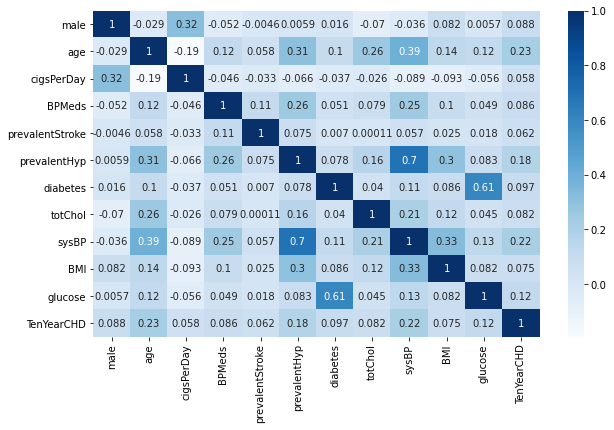

<Figure size 1440x1440 with 0 Axes>

In [10]:
#get correlations of each features in dataset, this done visually, with the help from seaborn library
fig, axes = plt.subplots(figsize = (10,6))
#corrmat1 is the object stores the correlation data
corrmat1 = mydata.corr()
top_corr_features = corrmat1.index
plt.figure(figsize=(20,20))
#Calling heatmap() from the seaborn library, and providing annot = True says that to include the values on plot
g=sns.heatmap(mydata.corr(),annot=True,cmap= plt.cm.Blues, ax = axes)

<AxesSubplot:xlabel='Gender', ylabel='TenYearCHD'>

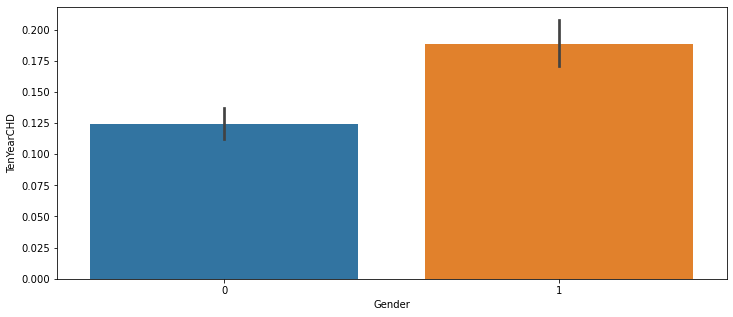

In [12]:
#plotting barplot() from the seaborn module having x-axis on'gender', y-axis on 'TenYearCHD'
plt.figure(figsize=(12,5))
mydata.rename(columns={'male':'Gender'},inplace=True)
sns.barplot(x='Gender',y='TenYearCHD', data = mydata)

<AxesSubplot:xlabel='prevalentStroke', ylabel='TenYearCHD'>

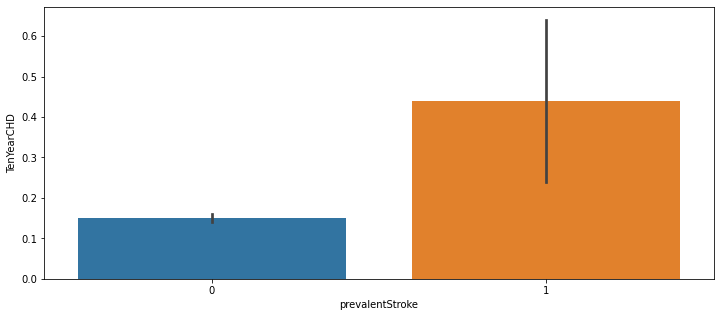

In [13]:
#plotting barplot() from the seaborn module having x-axis on'prevalentStroke', y-axis on 'TenYearCHD'
plt.figure(figsize=(12,5))
sns.barplot(x='prevalentStroke',y='TenYearCHD', data = mydata)

<AxesSubplot:xlabel='prevalentHyp', ylabel='TenYearCHD'>

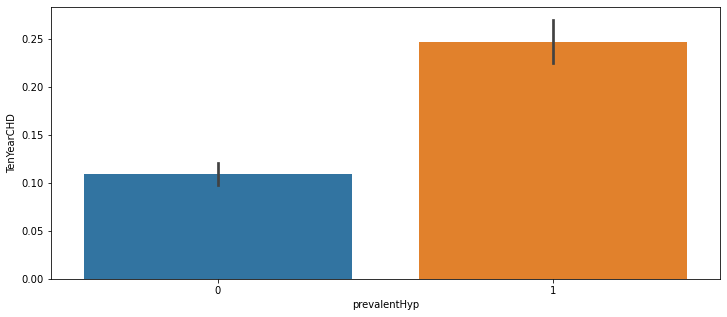

In [14]:
#plotting barplot() from the seaborn module having x-axis on'diabetes', y-axis on 'TenYearCHD'
plt.figure(figsize=(12,5))
sns.barplot(x='prevalentHyp',y='TenYearCHD', data = mydata)

<AxesSubplot:xlabel='diabetes', ylabel='TenYearCHD'>

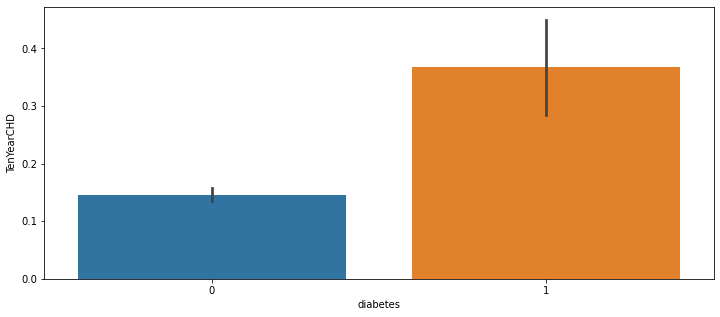

In [15]:
#plotting barplot() from the seaborn module having x-axis on'diabetes', y-axis on 'TenYearCHD'
plt.figure(figsize=(12,5))
sns.barplot(x='diabetes',y='TenYearCHD', data = mydata)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BMI', ylabel='Density'>

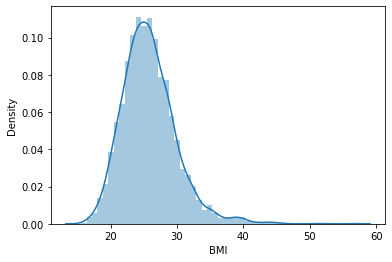

In [16]:
#Using distplot() function we can generate 'BMI' column distribution
sns.distplot(mydata['BMI'])

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='totChol', ylabel='Density'>

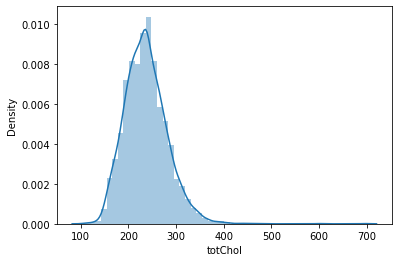

In [17]:
#seaborn library also provides distribution plot, where we can observe how the data is spreaded
#Using distplot() function we can generate 'totChol' column distribution
sns.distplot(mydata['totChol'])

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sysBP', ylabel='Density'>

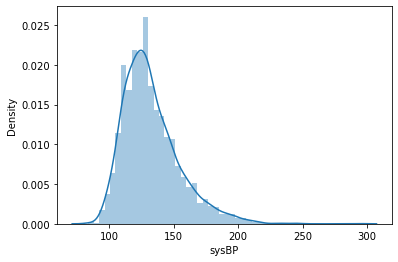

In [18]:
#seaborn library also provides distribution plot, where we can observe how the data is spreaded
#Using distplot() function we can generate 'sysBP' column distribution
sns.distplot(mydata['sysBP'])

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='glucose', ylabel='Density'>

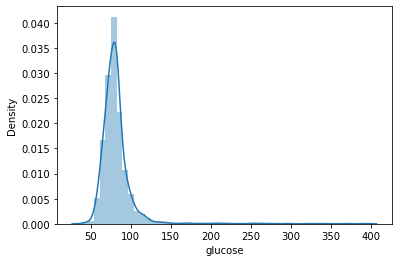

In [19]:
#Using distplot() function we can generate 'glucose' column distribution
sns.distplot(mydata['glucose'])

In [20]:

def vif_cal(input_data,dependent_col):
    import statsmodels.formula.api as sm
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]]
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x",data=x_vars).fit().rsquared
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], "VIF =" , vif)
        
vif_cal(input_data=mydata, dependent_col="TenYearCHD")

Gender VIF = 1.14
age VIF = 1.29
cigsPerDay VIF = 1.17
BPMeds VIF = 1.1
prevalentStroke VIF = 1.02
prevalentHyp VIF = 2.01
diabetes VIF = 1.59
totChol VIF = 1.1
sysBP VIF = 2.19
BMI VIF = 1.16
glucose VIF = 1.6


In [21]:
#let's make a list with all the features from the dataset by creating a feature_cols variable
feature_cols = ['Gender', 'age', 'cigsPerDay','prevalentStroke', 'prevalentHyp',
                'diabetes', 'totChol', 'sysBP', 'BMI','glucose']
#here dividing the data set to only independent columns
X = mydata[feature_cols]
#Taking only the target column which is to be predicted
Y = mydata.TenYearCHD

In [22]:
#From sklearn library we are importing the model_selection module for dividing data
import sklearn.model_selection as ms
#Also importing the the preprocessing module to clean the data
import sklearn.preprocessing as pre
#sklearn.linear_model follows the staight line equation where we can create the hypothesis line
import sklearn.linear_model as lm
#From skearn.preprocessing standardScaler is imported to have all the values in range of normal distribution
from sklearn.preprocessing import StandardScaler

In [23]:
X = pre.minmax_scale(X)
X.shape

(4240, 10)

In [24]:
#Creating the object of standardscaler()
scaler = StandardScaler()
#Fitting the dataset to standardscaler() function
features_standardized = scaler.fit_transform(X)

In [25]:
#Importing LabelEncoder function from sklearn preprocessing
from sklearn.preprocessing import LabelEncoder
#creating the object of LabelEncoder()
label_encoder=LabelEncoder()
for i in enumerate(X):
    #Fitting the categorical columns to the LabelEncoder object
    if X.dtype=='object':
        X=labe_encoder.fit_transform((X))

In [26]:
#train_test_split function splits the data into 2 parts, training dataset and testing dataset
#setting test_size = 0.3 means dividing dataset 30% to test data.
x_train,x_test,y_train,y_test = ms.train_test_split(X,Y,test_size=0.3,random_state=0)

In [27]:
#This is just to check the size of data divided
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((2968, 10), (1272, 10), (2968,), (1272,))

# Logistic Regression

In [28]:
#Logistic Regression is imported from sklearn library under linear module, Logistic Regression is basically used for classification model
#random_state = 0, means to replicate the results
classifier=lm.LogisticRegression(random_state=0,class_weight=None,fit_intercept=True,intercept_scaling=1)
classifier.fit(x_train,y_train)
#setting the threshold to 0.16
THRESHOLD = 0.16
y_pred = np.where(classifier.predict_proba(x_test)[:,1]>THRESHOLD,1,0)

<AxesSubplot:>

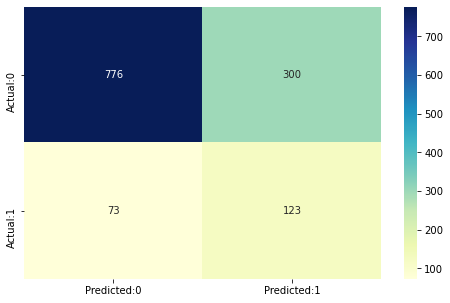

In [29]:
#confusion matrix provide the more information regarding how the data is distinguished
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
##creating dataframe for confusion matrix
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize=(8,5))
#Heatmap from the seaborn library provides the best visual on generated metrics
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")

In [30]:
(conf_matrix/len(y_test))*100

,Predicted:0,Predicted:1
Actual:0,61.006289,23.584906
Actual:1,5.738994,9.669811


In [31]:
#This line of code shows the accuracy of logistic regression
Accuracy=classifier.score(x_train,y_train)
Accuracy

0.8554582210242587

In [32]:
#This line of code shows the precision of logistic regression
Precision=classifier.score(x_test,y_test)
Precision

0.8514150943396226

In [36]:
import sklearn
#This line of code shows the recall of logistic regression
Recall = sklearn.metrics.recall_score(y_test,y_pred)
Recall

0.6275510204081632

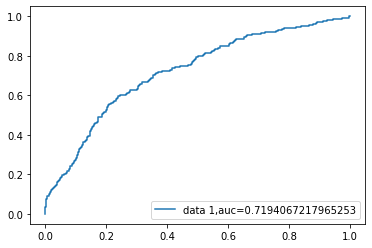

In [37]:
from sklearn import metrics
#predict_proba is the function which shows the most probability value form the data set
y_pred_proba = classifier.predict_proba(x_test)[::,1]
#plotting the roc curve gives us insights on the trained model
fpr,tpr,_ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test,y_pred_proba)
#plotting the graph for the generated roc score
plt.plot(fpr,tpr,label="data 1,auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Decision Tree 

In [38]:
#DecisionTree classifier works based on the majority vote or average outcomes
#DecisionTreeClassifier is imported from sklearn.tree
from sklearn.tree import DecisionTreeClassifier
#creating the object for the DecisionTreeClassifier
model = DecisionTreeClassifier()
#Fitting the data to the created object of DecisionTreeClassifier
model.fit(x_train,y_train)
#predicting the results from predict function
predictions = model.predict(x_test)

In [39]:
predictions

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

In [40]:
#The classification report shows the most of the important metrics to analyze
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
#The main metrics includes prcision, recall and accuracy
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1076
           1       0.25      0.25      0.25       196

    accuracy                           0.77      1272
   macro avg       0.56      0.56      0.56      1272
weighted avg       0.77      0.77      0.77      1272

[[927 149]
 [147  49]]


<AxesSubplot:>

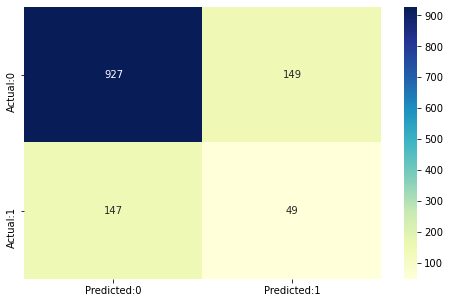

In [41]:
#plottig the confusion matrix for the predicted values
cm=confusion_matrix(y_test,predictions)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")

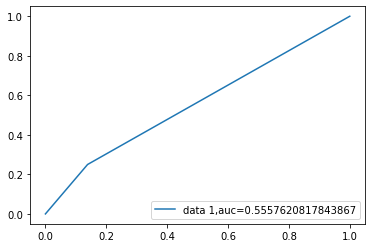

In [42]:
from sklearn import metrics
#predict_proba outputs the most probability of the class
y_pred_proba = classifier.predict_proba(x_test)[::,1]
#plotting the roc curve gives us insights on the trained model
fpr,tpr,_ = metrics.roc_curve(y_test, predictions)
#plotting the graph for the generated roc score
auc = metrics.roc_auc_score(y_test, predictions)
plt.plot(fpr,tpr,label="data 1,auc="+str(auc))
plt.legend(loc=4)
plt.show()

 # Support Vector Machine

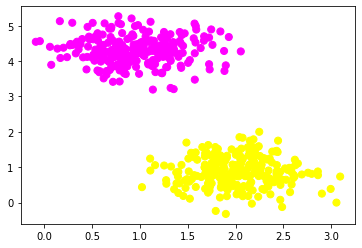

In [45]:
#make_blobs are the data consisting of 2 groups that is 2 clusters
#make_blobs are imported from sklearn.datasets
from sklearn.datasets import make_blobs
  
# creating datasets X containing n_samples
# Y containing two classes
X, Y = make_blobs(n_samples=500, centers=2,
                  random_state=0, cluster_std=0.40)
import matplotlib.pyplot as plt
# plotting scatters 
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='spring');
plt.show() 

In [46]:
from sklearn import svm
# Initialize SVM classifier by creating an object
clf = svm.SVC(kernel='linear')

In [47]:
#Fitting the data to the defined object support vector machine
clf = clf.fit(x_train, y_train)

In [48]:
#predicting the values for the x_test using predict() function
predictions1 = clf.predict(x_test)

In [49]:
predictions1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [50]:
#Classification report provides the information regarding accuracy, precision, recal and f1-score
print(classification_report(y_test, predictions1))
print(confusion_matrix(y_test, predictions1))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1076
           1       0.00      0.00      0.00       196

    accuracy                           0.85      1272
   macro avg       0.42      0.50      0.46      1272
weighted avg       0.72      0.85      0.78      1272

[[1076    0]
 [ 196    0]]


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

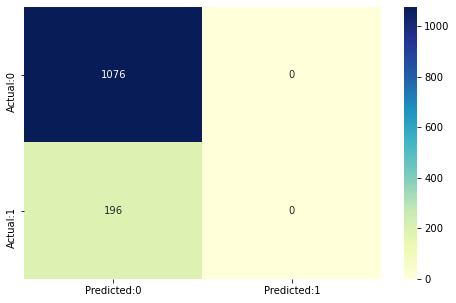

In [51]:
#confusion matrix outputs the values which are correctly and non correctly predicted
cm=confusion_matrix(y_test,predictions1)
#crating a dataframe for the confusion matrix
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize=(8,5))
#heatmp provides best way to visualize the vales generated by confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")

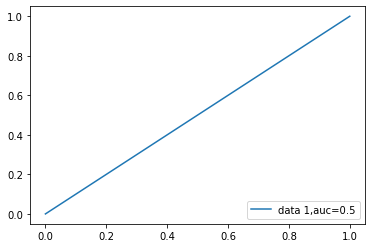

In [52]:
from sklearn import metrics
#predict_proba outputs the most probability of the class
y_pred_proba = classifier.predict_proba(x_test)[::,1]
#plotting the roc curve gives us insights on the trained model
fpr,tpr,_ = metrics.roc_curve(y_test, predictions1)
auc = metrics.roc_auc_score(y_test,predictions1)
#plotting the graph for the generated roc score
plt.plot(fpr,tpr,label="data 1,auc="+str(auc))
plt.legend(loc=4)
plt.show()